# Spotify Audio Features

In [1]:
%load_ext autoreload
%autoreload 2

## Fetch user track features

### Spotify API Client & Authentication

In [27]:
import spotipy

In [3]:
ACCESS_TOKEN = "BQBDFeIW8otsGIAs8EvaxkvRstUrMLCjpwWGrhiTJfQTu4JyIXJqJvF8XxK4T8DXskLAflq8XUeZALKPojBA_RQ4-S87Npkdmxcyj_b3lagcknPYmC71KHRgFAgfUR9UUyyaF95AKy1xQqcFTrBWHrCcGzhG-lKTn-v2LWqY9ow"
spotify = spotipy.Spotify(auth=ACCESS_TOKEN)

### Fetch current user's tracks

In [23]:
result = spotify.current_user_saved_tracks(limit=50)
track_list = [user_track["track"] for user_track in result["items"]]

### Query Spotify API for audio features

In [31]:
# Extract track IDs so we can fetch additional info
track_id_list = [track["id"] for track in track_list]
# Get track audio features
track_features_list = spotify.audio_features(track_id_list)
# Get track audio analysis
# track_analysis_list = [spotify.audio_analysis(track_id) for track_id in track_id_list]
import asyncio
loop = asyncio.get_running_loop()
track_analysis_list = await asyncio.gather(*[loop.run_in_executor(None, spotify.audio_analysis, track_id) for track_id in track_id_list])

In [74]:
track_analysis_list[0]["track"]

{'num_samples': 4722522,
 'duration': 214.17332,
 'sample_md5': '',
 'offset_seconds': 0,
 'window_seconds': 0,
 'analysis_sample_rate': 22050,
 'analysis_channels': 1,
 'end_of_fade_in': 0.11002,
 'start_of_fade_out': 206.76788,
 'loudness': -6.313,
 'tempo': 133.997,
 'tempo_confidence': 0.814,
 'time_signature': 4,
 'time_signature_confidence': 0.986,
 'key': 5,
 'key_confidence': 0.708,
 'mode': 0,
 'mode_confidence': 0.623,
 'codestring': 'eJxVmomRHTcMRFOZEHgf-Sfm95oraV3lspb8M0MSRwMNsJ0-Sr3nK187vd_W9nfXN8cdp457v7oY3nLXrPfOr_V1vjpqv3vW9fW2BsOyxm5rf31MHh7jlsEvH8_y2dv66LV8s-_lIqxX6rcKr49xTj2t9G-33vhxj3tm_TbzP3u4pXznsAo_nrGG-5tlfLvf2XZlgVoGz8xSzm13LMZzMZ4cp84zGR-Xuoe16_5qm2N8s9257xy83usZnHn3MlrnwH3fxku1n8U5nDjsprdb7-jX47ZyvtHauXsV1hu8-Y3eB9venbH7WftwkntYENmUb6-6CnJjeMb57u1lzzP4eZbNenyKw7oyW0NOrd5WEEWdk7dHmYiJIzHebH_zMJ8v6ocHv7XQnX8y9njIZBaO6HnW4pTz7lFysKUwkcVldR7kS-c7e3lW_qp79uVhLqLtLL8v0uFJhD0av5_Gbq8WMEbj6wdNf-ug-NEWz5-FCcyLzPZG9ogOE2hln-Lil4197LWvOrSc2_nmbnxtog_GGxsZPIvyWacVDI_xVrm

### Construct & normalize audio features

In [75]:
def get_features(*, track=None, audio_features=None, audio_analysis=None):
    features = {}
    if track:
        keys = ("popularity",)
#         features.update({key: track[key] for key in keys})
    if audio_features:
        keys = ("danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo")
        features.update({key: audio_features[key] for key in keys})
    if audio_analysis:
        audio_analysis_track_features = audio_analysis["track"]
        keys = ("mode",)
        features.update({key: audio_analysis_track_features[key] for key in keys})
    return features

In [76]:
features_list = [get_features(track=track_list[idx], audio_features=track_features_list[idx], audio_analysis=track_analysis_list[idx]) for idx in range(len(track_id_list))]

In [77]:
features_df = pd.DataFrame(features_list)
normalized_features_df = (features_df - features_df.min()) / (features_df.max() - features_df.min())

In [79]:
normalized_features_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode
0,0.484897,0.952507,0.625901,0.244342,5.369718e-02,0.492308,0.112515,0.302594,0.555007,0.0
1,0.346582,0.282322,0.359894,0.082470,5.802823e-01,0.180513,0.091456,0.117003,0.404656,1.0
2,0.000000,0.844327,0.621390,0.142693,6.597984e-03,0.000679,0.151625,0.213833,0.578276,1.0
3,0.362480,0.406332,0.702525,0.037208,1.272210e-02,0.700513,0.103490,0.043228,0.024215,0.0
4,1.000000,0.482850,0.711701,0.363253,1.693035e-02,0.000334,0.100481,0.541210,0.219538,1.0
5,0.120827,0.172823,0.486858,0.096279,1.000000e+00,0.829744,0.097473,0.000000,0.967800,0.0
6,0.599364,0.519789,0.635544,0.023782,1.649943e-01,1.000000,0.873646,0.808646,0.468012,1.0
7,0.468998,0.585752,0.478044,0.000000,4.826089e-03,0.896410,0.070397,0.482421,0.674735,1.0
8,0.572337,0.662269,0.516097,0.118911,1.770555e-02,0.000857,0.518652,0.421326,0.262116,1.0
9,0.747218,0.861478,0.727306,0.252397,6.333418e-04,0.107692,0.142599,0.508934,0.489769,1.0


## Compute the 'best' order for the user's tracks

In [80]:
import numpy as np
import scipy.spatial

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

(50, 10)


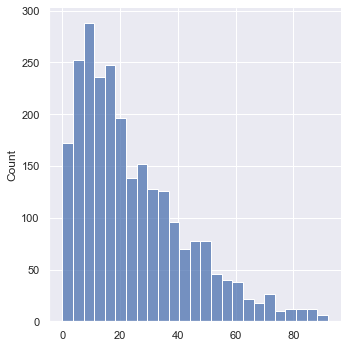

In [82]:
NORM_P = 2
points = features_df.to_numpy()
print(points.shape)
distance_matrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(points, "minkowski", p=NORM_P))
sns.displot(distance_matrix.flatten())

In [83]:
from simanneal import Annealer

rng = np.random.default_rng()

class BottleneckAnnealer(Annealer):
    copy_strategy = "method"  # Use `self.state.copy()` to copy the state
    
    # Override default hyperparameters
    Tmin = 1e-6
    Tmax = 1e3
    steps = 250000
    updates = 250

    def __init__(self, *args, path: np.ndarray, distance_matrix: np.ndarray, **kwargs):
        super().__init__(path, *args, **kwargs)
        self.distance_matrix = distance_matrix
        self.num_points = len(self.state)

    def move(self):
        """
        Randomly swap points
        """
        num_swaps = int(np.random.rand() * 4)
        swaps = rng.choice(self.num_points, (num_swaps, 2), replace=False)
        self.state[swaps] = self.state[swaps[..., ::-1]]

    def energy(self):
        """
        Compute the energy of the current path
        """
        # Find the length of the edge from each node in the path to the next
        source_nodes = self.state
        target_nodes = np.roll(source_nodes, 1)
        edge_distances = self.distance_matrix[source_nodes, target_nodes]
        max_edge_length = edge_distances.max()
#         mean_edge_length = edge_distances.mean()
        energy = max_edge_length
        return energy

### Initialize the annealer

In [84]:
annealer = BottleneckAnnealer(path=np.arange(len(points)), distance_matrix=distance_matrix)
print(f"Start energy: {annealer.energy()}")

Start energy: 75.33187966671348


### Optimize

In [85]:
best_path, best_energy = annealer.anneal()
print(f"Best energy: {best_energy}")
print(best_path)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.00000         19.28    31.40%     0.00%     0:00:12     0:00:00

Best energy: 19.280167017948845
[39  5 27 18 14 11  0 36 43 28 25 48  1 15 19 45  9 47 10 35 22 38 31 16
 29 23  8 41  3 33 34 40 32 30 26 42 20  2 46 21 12 13 37  4 49 44 24  6
  7 17]


In [87]:
features_df.iloc[best_path]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode
39,0.474,0.932,-2.376,0.0547,0.001970,0.000091,0.0826,0.4000,174.903,1
5,0.308,0.359,-8.995,0.0514,0.903000,0.809000,0.1030,0.0365,171.943,0
27,0.321,0.984,-4.181,0.0559,0.000012,0.000000,0.4030,0.3590,170.162,1
18,0.491,0.879,-2.722,0.0652,0.391000,0.000000,0.3420,0.5710,160.092,0
14,0.752,0.650,-6.194,0.0334,0.264000,0.000001,0.3130,0.9040,141.160,1
11,0.417,0.228,-18.386,0.0476,0.849000,0.715000,0.3740,0.2180,136.527,0
0,0.537,0.950,-6.313,0.0900,0.048500,0.480000,0.1080,0.2990,133.997,0
36,0.541,0.813,-10.637,0.0291,0.005590,0.946000,0.1810,0.7640,140.026,1
43,0.714,0.456,-9.412,0.0389,0.459000,0.911000,0.1100,0.0859,130.033,0
28,0.808,0.650,-9.351,0.0628,0.280000,0.254000,0.3590,0.8130,120.008,1


In [86]:
optimally_ordered_tracks = [track_list[idx]["uri"] for idx in best_path]
for url in optimally_ordered_tracks:
    print(url)

spotify:track:70NEQeOCAz5jl6CS8SQ6Vg
spotify:track:6FKPPNjMFEekgUfy5v838t
spotify:track:7fVlbM9hxmv3Omz4UPcsy8
spotify:track:2BlDX1yfT0ea5wo0vjCKKa
spotify:track:0ClnfM4PI0wjlCVTJc9lP7
spotify:track:14ncdb9wiuGp0PliplZkad
spotify:track:2ExX3amzlJ0OvDHslQwPdn
spotify:track:12jK9HBnD9UyVmoAWeBDIR
spotify:track:0lRbPTSlLjBk8Yl7x7UULj
spotify:track:5VcOZYRlC02MDPD95bi0rs
spotify:track:570Sz8fASQY47LDVZ5GzTB
spotify:track:2vzbNt9SHL1DQ2o1LtWuuR
spotify:track:2NGhKPZdZk2pPZinWphTzh
spotify:track:4T6FWA703h6H7zk1FoSARw
spotify:track:5XZK1CC3LybEKGdmH04YBC
spotify:track:7gRq0vdOVqcVL1zKR2F6u6
spotify:track:0CNfKAVDmGAJ4yuGDuGKCd
spotify:track:37qQL8k0K15vUdkUNfKC4V
spotify:track:6109JNRSWsyph4120DTx7l
spotify:track:3r9mYXFYhlA8Z84hdY00MQ
spotify:track:4oj7gtV7uc7wkw6zijTr4X
spotify:track:7IEHc5BVgiN1J6lSSkzWj3
spotify:track:14XWxMtz3iJ0vmy5tNebyB
spotify:track:7zyqJJ0QwajaHaPLCqZFXN
spotify:track:7o9wpDM622yGhHJTxDd4dQ
spotify:track:2d1MywHy6FwKdzxFuSJnwl
spotify:track:6037kWfTxGjlfcmI919HYB
s